In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/lenovo/downloads/dav placement.csv")

In [3]:
df.head()

,S No,Company,Students Selected,Package,Industry,Year,Company Type
0,1,Publicis Sapient,1,10.0,Digital consultancy,2022,Service
1,2,Infosys,1,8.0,Software/IT Services,2022,Service
2,3,IBM,1,7.5,Machines/Hardware,2022,Product & Service
3,4,MAQ Software,1,9.0,Software/IT Services,2022,Service
4,5,Thrillophilia,2,7.5,Travel curator,2022,Service


In [4]:
df.columns

Index(['S No', 'Company', 'Students Selected', 'Package', 'Industry', 'Year',
       'Company Type'],
      dtype='object')

In [5]:
print("No of rows are : ",df.shape[0])

No of rows are :  77


### The Csv was developed by students of Ai 2020
### while entering "Company type" attribute data manually, errors might present.
### Due to same company appeared multiple times in "Company" attribute. We have to check whether the "Company" and its corresponding "Company Type" remains same for all the repeatations
### Let's check Sanity of data before moving forward in analysis


In [6]:
test = df[["Company", "Company Type"]]
#Sorting test data frame company name
test.sort_values(by = ["Company"])

,Company,Company Type
47,Amazon (Off-Campus),Product
37,BigBasket,Product
36,Byjus,Product
8,CGI,Service
6,Capgemini,Service
...,...,...
42,Wipro,Service
71,Wipro,Service
62,Wipro (Off-Campus),Service
10,Zycus,Product


In [7]:
#As same company names fall next to each other, lets see whether same "company type" ..
# ..for those repeated companies are same or not


for i in range(len(test["Company"])-1):
    if test["Company"][i] == test["Company"][i+1]:
        if test["Company Type"][i] != test["Company Type"][i+1]:
            print(test["Company"][i], "not matching")
            

print("Data is Valid")

Data is Valid


### No print statements occured. Hence, Data is Valid we can proceed

In [8]:
df.describe()

,S No,Students Selected,Package,Year
count,77.000000,77.000000,77.000000,77.000000
mean,39.000000,2.753247,6.886494,2020.688312
std,22.371857,3.829099,3.887432,1.029304
min,1.000000,1.000000,3.360000,2019.000000
25%,20.000000,1.000000,4.500000,2020.000000
50%,39.000000,1.000000,6.000000,2021.000000
75%,58.000000,3.000000,8.000000,2021.000000
max,77.000000,29.000000,30.000000,2022.000000


## Observation 1:
* <font size="3"> We can see that highest package ever offered is 30LPA and lowest is 3.36 </font>

* <font size="3"> Median salary lies at 6lpa whereas the mean is 6.88lpa </font>

### Lets check year wise stats

In [10]:
df_2019 = df[df["Year"] == 2019]
df_2019.describe()

,S No,Students Selected,Package,Year
count,13.00000,13.000000,13.000000,13.0
mean,71.00000,2.000000,5.503846,2019.0
std,3.89444,2.041241,2.273073,0.0
min,65.00000,1.000000,3.500000,2019.0
25%,68.00000,1.000000,4.000000,2019.0
50%,71.00000,1.000000,5.000000,2019.0
75%,74.00000,2.000000,6.000000,2019.0
max,77.00000,8.000000,10.500000,2019.0


## Observation 2: 
### From 2019 placements data
* <font size="3"> We can see the highest was 10.5LPA and least is 3.5 </font>
* <font size="3"> Median lies at 5Lpa whereas mean lies at 5.5 </font>

## Instead of going through every year stats lets compare each year performance Visually which might be more insightful

In [11]:
#Creating a Dataframe with each year mean , median, max and min packages

mean_df = df.groupby("Year").mean()
mean_df.drop(["S No", "Students Selected"], axis = "columns", inplace = True)
mean_df.rename(columns = {"Package":"mean CTC"}, inplace = True)

median_df = df.groupby("Year").median()
median_df.drop(["S No", "Students Selected"], axis = "columns", inplace = True)
median_df.rename(columns = {"Package":"median CTC"}, inplace = True)

max_df = df.groupby("Year").max()
max_df.drop(["S No", "Students Selected", "Company", "Company Type", "Industry"], axis = "columns", inplace = True)
max_df.rename(columns = {"Package":"max CTC"}, inplace = True)

min_df =  df.groupby("Year").min()
min_df.drop(["S No", "Students Selected", "Company", "Company Type", "Industry"], axis = "columns", inplace = True)
min_df.rename(columns = {"Package":"min CTC"}, inplace = True)

hist_df = pd.concat([mean_df, median_df, max_df, min_df], axis=1, join='inner')
hist_df.rename(columns = {"max CTC":"max CTC", "mean CTC" : "mean CTC" , "median CTC" : "median CTC", "min CTC" : "min CTC"}, inplace = True)
hist_df

,mean CTC,median CTC,max CTC,min CTC
Year,,,,
2019,5.503846,5.0,10.50,3.50
2020,8.240000,6.0,30.00,3.36
2021,5.852143,5.0,15.00,3.36
2022,8.145789,7.5,14.32,5.00


### Here is the data frame over the years
### Lets see it pictorially

In [12]:
#As we used groupby to year we can't iterate through "year" and we can't use sns library on it
#so, lets add a new list as year
year = ["2019", "2020", "2021", "2022"]
hist_df["year"] = year
hist_df

,mean CTC,median CTC,max CTC,min CTC,year
Year,,,,,
2019,5.503846,5.0,10.50,3.50,2019
2020,8.240000,6.0,30.00,3.36,2020
2021,5.852143,5.0,15.00,3.36,2021
2022,8.145789,7.5,14.32,5.00,2022


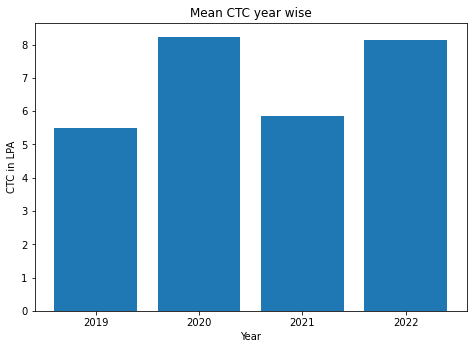

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(hist_df["year"], hist_df["mean CTC"])
plt.title("Mean CTC year wise")
plt.xlabel("Year")
plt.ylabel("CTC in LPA")
plt.show()

## Observation 3:
* <font size="4"> We Can clearly see mean CTC is increasing over the years except for 2021 </font> 
* <font size="4"> That dip in that year might be caused due to Covid pandemic </font>

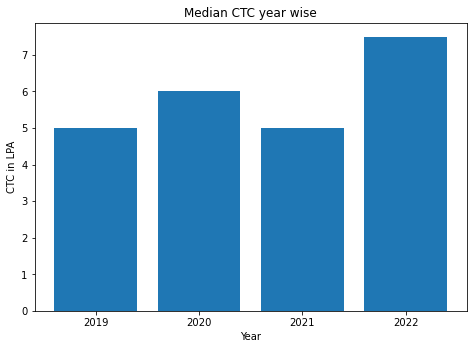

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(hist_df["year"], hist_df["median CTC"])
plt.title("Median CTC year wise")
plt.xlabel("Year")
plt.ylabel("CTC in LPA")
plt.show()

## Observation 4:
<font size="4"> The median CTC is also increasing each year that too with a good pace though there was a dip in 2021 </font>


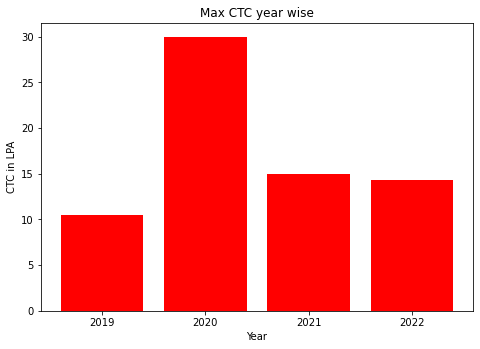

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(hist_df["year"], hist_df["max CTC"], color = "r")
plt.title("Max CTC year wise")
plt.xlabel("Year")
plt.ylabel("CTC in LPA")
plt.show()

## Observation 5:
* <font size="4"> There is no particular trend in Max CTC. </font>
* <font size="4"> Institute recorded highest CTC in the year 2020 </font>


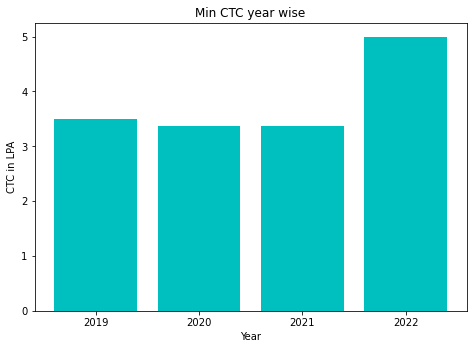

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(hist_df["year"], hist_df["min CTC"], color = "c")
plt.title("Min CTC year wise")
plt.xlabel("Year")
plt.ylabel("CTC in LPA")
plt.show()

## Observation 6:
* <font size="4"> The minimum CTC mostly stayed stable unti 2021. </font>
* <font size = "4"> But it got drastically increased in the year 2022 which is a
   good sign </font>


In [18]:
## Lets see which company hired most of the students in a single year
a = 0
for i in range(len(df["Company"])):
    if(df["Students Selected"][i] >= a):
        a = df["Students Selected"][i]
        c = df["Company"][i]
        y = df["Year"][i]
        p = df["Package"][i]
print("Most no of students hired in a single year was", a, "by the company", c, "in the year", y)

Most no of students hired in a single year was 29 by the company Cognizant in the year 2022


## Observation 7:
* <font size = "4"> Cognizant is the mass recuriter for the institute </font>
* <font size = "4"> It hired 29 students in the year 2022 </font>


### Lets explore to the industry type attribute

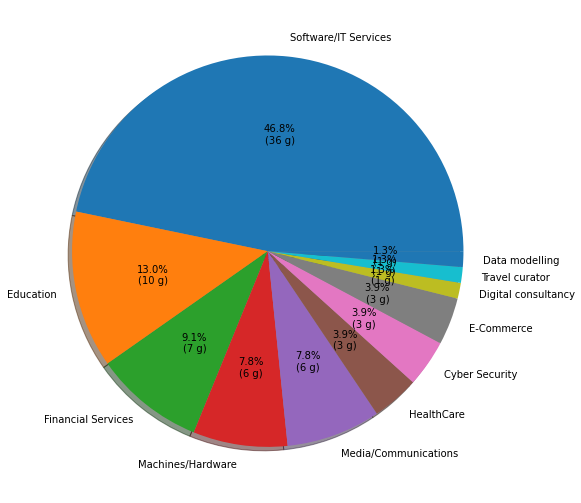

In [20]:
def func(pct, allvalues):
    absolute = int(pct / 100.*(np.sum(allvalues)+1))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

ind = ["Software/IT Services","Education","Financial Services","Machines/Hardware","Media/Communications","HealthCare","Cyber Security", "E-Commerce", "Digital consultancy" ,"Travel curator","Data modelling"]

ind_count  = []
for i in df["Industry"].value_counts():
    ind_count.append(i)
fig = plt.figure(figsize =(15, 9))
plt.pie(ind_count, labels = ind, shadow = True, autopct = lambda pct: func(pct, ind_count))

plt.show()

## Observation 8:
## we are having a better picture from pie chart 
*  <font size = "4"> We can clearly see Software/IT services is the major sector placements are happening </font>
* <font size = "4"> Following to that we have Education and Finance serivce companies vists the campus more</font>

### Lets see what type of companies approaching placement cell 

In [21]:
df["Company Type"].value_counts()

Service              48
Product              27
Product & Service     2
Name: Company Type, dtype: int64

## Observation 9:
*  <font size = "4"> Service based companies visiting the campus more no of times


## Checking which company spent most in hirings on a single visit

* Logic followed to find is multiplying "Students Selected" against the "Package" they offered

In [23]:
k = 0
for j in range(len(df["Students Selected"])):
    if(df["Students Selected"][j] * df["Package"][j] > k):
        k = df["Students Selected"][j] * df["Package"][j]
        comp = df["Company"][j]
print("Company", comp, "Spent more in hiring at single time with worth", k, "LPA hirings")

Company Cognizant Spent more in hiring at single time with worth 195.75 LPA hirings


## Observation 10:
* <font size = "4"> Cognizant is the company spent most in hirings on a single visit
*  <font size = "4"> It Spent 195.75 Lakh rupees in hiring the students </font> 

In [25]:
#EDA done by Uday sai Tanna
# 120AD0022 
# UG 2nd yr AI 
# IIITDM